In [ ]:
'''
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_json('historic_rates.json', lines=True)
# print(df.shape)
# df = df[['id','close','high','low','open','time','volume']]
df = df[:30000]# take first 10000 lines of data
df= df[['close']] # only look at close price
dataset = df.values.astype('float32')
# print(dataset)
# transfer the dataset to be ranged from 0-1 thus could be used in the active function
dataset = MinMaxScaler(feature_range=(0, 1)).fit_transform(dataset)
print(dataset)
'''

In [1]:
-

#if __name__ == "__mian__":
    #df = pd.read_json('historic_rates.json', lines=True)
    #print(df.shape)
    

Using TensorFlow backend.


In [2]:
from numpy import fliplr
from numpy import flipud
df = pd.read_json('historic_rates.json', lines=True)
df = df[:30000]
df = df[['close']]
print(df[:10])
#df = fliplr(df)
df = flipud(df)
dataset = df.astype('float32')
mms = MinMaxScaler(feature_range=(0, 1))
dataset = mms.fit_transform(dataset)

     close
0  9294.85
1  9272.62
2  9255.40
3  9206.02
4  9155.00
5  9145.94
6  9129.74
7  9090.25
8  9090.26
9  9097.13
[[7020.01]
 [7001.01]
 [7001.01]
 [7001.01]
 [7000.  ]
 [7039.  ]
 [7044.55]
 [7044.9 ]
 [7044.89]
 [7040.01]]


In [3]:
#dataset = data_extraction('historic_rates.json')
train_size = int(len(dataset)*0.85)
train_set, test_set = dataset[0:train_size, : ], dataset[train_size: , : ]
print(len(train_set),len(test_set),len(dataset))


25500 4500 30000


In [4]:
x_train, y_train = take_by_window(train_set, 10)
x_test, y_test = take_by_window(test_set, 10)


In [5]:
#x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
#x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [6]:
score, pred_train, pred_test = pred_model(x_train, y_train, x_test, y_test, step_size=1, num_features=10, epochs=100, batch_size=128, verbose=2)
print(score)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/100
1s - loss: 0.0718
Epoch 2/100
0s - loss: 0.0274
Epoch 3/100
0s - loss: 0.0262
Epoch 4/100
0s - loss: 0.0270
Epoch 5/100
0s - loss: 0.0253
Epoch 6/100
0s - loss: 0.0252
Epoch 7/100
0s - loss: 0.0262
Epoch 8/100
0s - loss: 0.0264
Epoch 9/100
0s - loss: 0.0261
Epoch 10/100
0s - loss: 0.0259
Epoch 11/100
0s - loss: 0.0255
Epoch 12/100
0s - loss: 0.0254
Epoch 13/100
0s - loss: 0.0262
Epoch 14/100
0s - loss: 0.0256
Epoch 15/100
0s - loss: 0.0260
Epoch 16/100
0s - loss: 0.0258
Epoch 17/100
0s - loss: 0.0244
Epoch 18/100
0s - loss: 0.0275
Epoch 19/100
0s - loss: 0.0263
Epoch 20/100
0s - loss: 0.0264
Epoch 21/100
0s - loss: 0.0257
Epoch 22/100
0s - loss: 0.0261
Epoch 23/100
0s - loss: 0.0265
Epoch 24/100
0s - loss: 0.0268
Epoch 25/100
0s - loss: 0.0262
Epoch 26/100
0s - loss: 0.0262
Epoch 27/100
0s - loss: 0.0259
Epoch 28/100
0s - loss: 0.

In [7]:
pred_train = mms.inverse_transform(pred_train)
y_train = mms.inverse_transform(y_train)
pred_test = mms.inverse_transform(pred_test)
y_test = mms.inverse_transform(y_test)

/Users/anwang/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/anwang/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [8]:
window = 10
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window:len(pred_train) + window, :] = pred_train 

In [9]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(pred_train) + (window * 2) + 1:len(dataset) - 1, :] = pred_test

In [ ]:
plt.plot(dataset, label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.plot(df, label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()

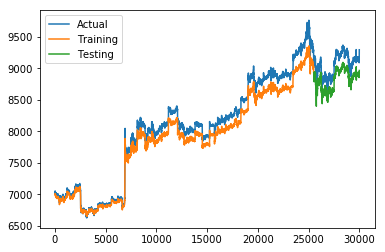

In [10]:
plt.plot(df, label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"]).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"]).close, label='Testing')
plt.legend(loc='best')
plt.show()

In [12]:
trainScore = math.sqrt(mean_squared_error(y_train, pred_train[:, 0]))
print('Train Score: %.2f MSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, pred_test[:, 0]))
print('Test Score: %.2f MSE' % (testScore))

Train Score: 160.30 MSE
Test Score: 234.97 MSE


In [31]:
import time
from datetime import datetime, date
td = datetime.today().date().isoformat()
td

'2018-05-28'

In [32]:
a = int(time.mktime(datetime.now().timetuple()))
a

1527435652

In [51]:
datetime.now().strftime('%Y/%m/%d %H:%M:%S')

'2018/05/28 01:55:10'

In [52]:
time.mktime(datetime.now().timetuple())

1527436511.0

In [53]:
time.mktime(datetime.now().timetuple())-datetime.now().timetuple().tm_sec


1527436500.0

In [43]:
datetime.now().strftime('%Y/%m/%d %H:%M:00')

'2018/05/28 01:51:00'

In [39]:
date.strptime

AttributeError: type object 'datetime.date' has no attribute 'strptime'

In [41]:
datetime.now()

datetime.datetime(2018, 5, 28, 1, 50, 28, 284264)